In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()

data.Gender = encoder.fit_transform(data.Gender)
data.Geography = encoder.fit_transform(data.Geography)

In [6]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [23]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
yhat = lr.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test, yhat))

[[1542   53]
 [ 333   72]]


In [29]:
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.82      0.97      0.89      1595
          1       0.58      0.18      0.27       405

avg / total       0.77      0.81      0.76      2000



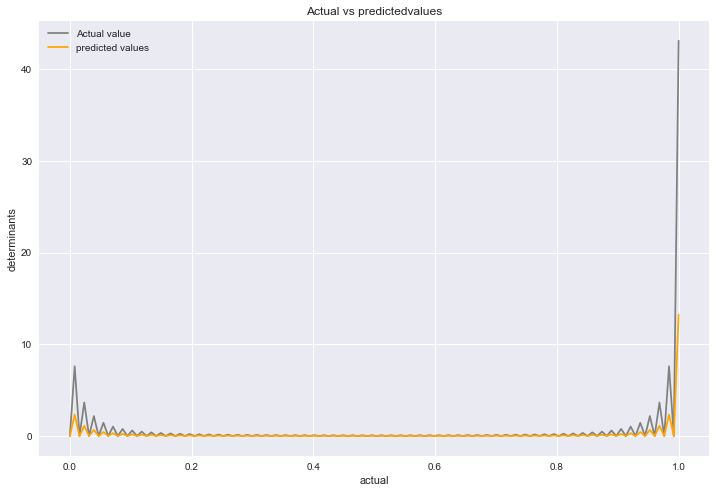

In [34]:
width = 12
height = 8
plt.figure(figsize=(width, height))
ax1 = sns.distplot(data['Exited'], hist=False, color = 'gray', label = 'Actual value')
sns.distplot(yhat, hist=False, color='orange', label = 'predicted values', ax = ax1)
plt.title('Actual vs predictedvalues')
plt.xlabel('actual')
plt.ylabel('determinants')
plt.show()